# EDA - Amazon Ads All


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting styles for plots
plt.style.use('ggplot')

In [2]:
# Define the path to file

# data_all = pd.read_csv("/Users/mayliamoua/Desktop/Boardroom Analytics/Amazon_Ads/SU-shareable-all.csv")
data = pd.read_csv("/Users/mayliamoua/Desktop/Boardroom Analytics/Amazon_Ads/Amazon Ads All.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   84373  1295011  7875390725    offsite_desktop         2043       0   
2   84373  6370624  9985955750  offsite_mobileweb         1452       0   
3   84373  1295011  7875390725    offsite_desktop         1312       0   
4   84373  1295011  7875390725  offsite_mobileapp            8       0   

   auction_cost  adjusted_cost hit_day_utc  \
0      10.89000        8.79000    02/05/24   
1      26.61464       19.44791    01/05/24   
2      14.52000       11.68400    01/05/24   
3      16.59940       11.94286    30/04/24   
4       0.11608        0.07161    01/05/24   

                                 targeting_secondary    vertical  \
0       category=Automotive Replacement Control Arms  Automotive   
1         category=Automotive Replacement Brake Kits  Automotive   
2       category=Automotive Replacement Control Arms  Automotive   
3  category=Automotive Replacement Hub Assemblies...  Automotive   
4         category=Automotive Replacement Brake Kits  Automotive   

         sub_vertical  ntb_click_attributed_units_sold  \
0  Automotive - Other                              0.0   
1  Automotive - Other                              0.0   
2  Automotive - Other                              0.0   
3  Automotive - Other                              0.0   
4  Automotive - Other                              0.0   

   ntb_view_attributed_units_sold  ntb_click_attributed_orders  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   ntb_view_attributed_orders  view_attributed_units_sold  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   view_attributed_orders  
0                     1.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

## Data Exploration and Cleaning

**Initial Data Exploration**

The dataset consists of several key columns, including advertiser ID, ad ID, SKU, placement slot, impressions, clicks, auction cost, adjusted cost, date, targeting information, verticals, sub-verticals, and various sales and orders metrics. 

Here are the steps to take to explore and clean this data:

**Check for Missing Values and Data Types:**
Identify any missing values and make sure data types are appropriate for each column.

**Convert Date Column:**
The hit_day_utc column, representing the date the ad ran, can be converted to a datetime format.

**Basic Descriptive Statistics:**
Generate descriptive statistics for numerical columns to understand the distribution of impressions, clicks, costs, and sales metrics.

### Data Cleaning

Start by checking for missing values and converting the date column to the appropriate format.

In [4]:
# Print unique values in 'hit_day_utc'
# print(data['hit_day_utc'].unique())

In [5]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes


In [6]:
## CLEANING
# Attempt to parse dates in the '%d/%m/%y' format
data['hit_day_utc_parsed'] = pd.to_datetime(data['hit_day_utc'], format='%d/%m/%y', errors='coerce')
 
# Parse remaining unparsed dates in the '%Y-%m-%d %H:%M:%S' format
mask = data['hit_day_utc_parsed'].isna()
data.loc[mask, 'hit_day_utc_parsed'] = pd.to_datetime(data.loc[mask, 'hit_day_utc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
 
# Check for any remaining non-parsed dates
remaining_non_parsed = data[data['hit_day_utc_parsed'].isna()]
if not remaining_non_parsed.empty:
    print("Remaining non-parsed dates:")
    print(remaining_non_parsed)
    
# Print unique months in the parsed 'hit_day_utc_parsed' column
print("Unique months in 'hit_day_utc_parsed':")
print(data['hit_day_utc_parsed'].dt.month.unique())
 
# Extract month and day of the week from parsed dates
data['month_name'] = data['hit_day_utc_parsed'].dt.strftime('%B')  # Get month names
data['day_name'] = data['hit_day_utc_parsed'].dt.strftime('%A')    # Get day names
 
# Fill missing values in 'vertical' and 'sub_vertical' with 'Unknown'
data['vertical'].fillna('Unknown', inplace=True)
data['sub_vertical'].fillna('Unknown', inplace=True)
 
# Identify the last 6 columns
last_6_columns = data.columns[-6:]

# Fill missing values in the last 6 columns with 0
data[last_6_columns] = data[last_6_columns].fillna(0)


Unique months in 'hit_day_utc_parsed':
[5 4 3 2]


In [7]:
missing_values

ADV_ID                                  0
AD_ID                                   0
SKU                                     0
placement_slot                          0
impressions                             0
clicks                                  0
auction_cost                            0
adjusted_cost                           0
hit_day_utc                             0
targeting_secondary                     0
vertical                            36572
sub_vertical                        84345
ntb_click_attributed_units_sold    219430
ntb_view_attributed_units_sold     219430
ntb_click_attributed_orders        219430
ntb_view_attributed_orders         219430
view_attributed_units_sold         219430
view_attributed_orders             219430
dtype: int64

In [8]:
data_types

ADV_ID                               int64
AD_ID                                int64
SKU                                  int64
placement_slot                      object
impressions                          int64
clicks                               int64
auction_cost                       float64
adjusted_cost                      float64
hit_day_utc                         object
targeting_secondary                 object
vertical                            object
sub_vertical                        object
ntb_click_attributed_units_sold    float64
ntb_view_attributed_units_sold     float64
ntb_click_attributed_orders        float64
ntb_view_attributed_orders         float64
view_attributed_units_sold         float64
view_attributed_orders             float64
dtype: object

In [9]:
# Replace missing values with 0
data.fillna(0, inplace=True) 


In [10]:
# Display the number of missing values again in each column to make sure there are none and code works above
print(data.isnull().sum().to_markdown(numalign="left", stralign="left"))

|                                 | 0   |
|:--------------------------------|:----|
| ADV_ID                          | 0   |
| AD_ID                           | 0   |
| SKU                             | 0   |
| placement_slot                  | 0   |
| impressions                     | 0   |
| clicks                          | 0   |
| auction_cost                    | 0   |
| adjusted_cost                   | 0   |
| hit_day_utc                     | 0   |
| targeting_secondary             | 0   |
| vertical                        | 0   |
| sub_vertical                    | 0   |
| ntb_click_attributed_units_sold | 0   |
| ntb_view_attributed_units_sold  | 0   |
| ntb_click_attributed_orders     | 0   |
| ntb_view_attributed_orders      | 0   |
| view_attributed_units_sold      | 0   |
| view_attributed_orders          | 0   |
| hit_day_utc_parsed              | 0   |
| month_name                      | 0   |
| day_name                        | 0   |


### Descriptive Statistics

Basic descriptive statistics for the numerical columns.

In [11]:
# Generate descriptive statistics for numerical columns
descriptive_stats = data.describe()

descriptive_stats

ADV_ID         AD_ID           SKU    impressions  \
count  573211.000000  5.732110e+05  5.732110e+05  573211.000000   
mean    56199.841619  5.317416e+06  5.120598e+09    2061.092791   
min     10110.000000  1.003314e+06  1.578709e+08       1.000000   
25%     32886.000000  3.003509e+06  2.744244e+09      21.000000   
50%     56105.000000  5.522375e+06  4.589607e+09     362.000000   
75%     78338.000000  7.485346e+06  7.404902e+09    2048.000000   
max     99955.000000  9.995508e+06  9.997725e+09  117800.000000   
std     26281.695691  2.602183e+06  2.642407e+09    3786.562341   

              clicks   auction_cost  adjusted_cost  \
count  573211.000000  573211.000000  573211.000000   
mean        0.339908      24.517010      17.842985   
min         0.000000       0.000000       0.000000   
25%         0.000000       0.250000       0.184000   
50%         0.000000       4.240000       3.176000   
75%         0.000000      26.063750      18.330675   
max        59.000000    2809.760000    1072.012760   
std         1.620772      48.764798      33.638077   

       ntb_click_attributed_units_sold  ntb_view_attributed_units_sold  \
count                    573211.000000                   573211.000000   
mean                          0.003889                        0.222382   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           0.000000                        0.000000   
max                           6.000000                       14.000000   
std                           0.071670                        0.516324   

       ntb_click_attributed_orders  ntb_view_attributed_orders  \
count                573211.000000               573211.000000   
mean                      0.003760                    0.207988   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.000000                    0.000000   
max                       5.000000                   12.000000   
std                       0.067851                    0.454439   

       view_attributed_units_sold  view_attributed_orders  \
count               573211.000000           573211.000000   
mean                     0.547934                0.499467   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      0.000000                0.000000   
75%                      1.000000                1.000000   
max                     92.000000               92.000000   
std                      1.589735                1.504571   

                  hit_day_utc_parsed  
count                         573211  
mean   2024-03-18 08:40:43.129667840  
min              2024-02-01 00:00:00  
25%              2024-02-25 00:00:00  
50%              2024-03-18 00:00:00  
75%              2024-04-11 00:00:00  
max              2024-05-02 00:00:00  
std                              NaN

In [12]:
# Drop rows with nulls in the specified columns
# data.dropna(subset=['ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders'], inplace=True)

# Filter to columns of interest
data_filtered = data[['impressions', 'clicks', 'auction_cost', 'adjusted_cost', 'hit_day_utc', 'targeting_secondary', 'vertical', 'sub_vertical']]

# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(data_filtered.describe().to_markdown(numalign="left", stralign="left"))

# Display value counts for categorical columns
print("\nValue counts for categorical columns:")
for col in ['targeting_secondary', 'vertical', 'sub_vertical']:
    print(f"\nColumn: {col}")
    print(data_filtered[col].value_counts().reset_index().rename(columns={'index':col, col:'count'}).to_markdown(index=False, numalign="left", stralign="left"))

# Check number of unique values for each column
print("\nNumber of unique values for each column:")
print(data_filtered.nunique().rename("num unique").to_markdown(numalign="left", stralign="left"))


Descriptive statistics for numerical columns:
|       | impressions   | clicks   | auction_cost   | adjusted_cost   |
|:------|:--------------|:---------|:---------------|:----------------|
| count | 573211        | 573211   | 573211         | 573211          |
| mean  | 2061.09       | 0.339908 | 24.517         | 17.843          |
| std   | 3786.56       | 1.62077  | 48.7648        | 33.6381         |
| min   | 1             | 0        | 0              | 0               |
| 25%   | 21            | 0        | 0.25           | 0.184           |
| 50%   | 362           | 0        | 4.24           | 3.176           |
| 75%   | 2048          | 0        | 26.0637        | 18.3307         |
| max   | 117800        | 59       | 2809.76        | 1072.01         |

Value counts for categorical columns:

Column: targeting_secondary
| count                                                                | count   |
|:---------------------------------------------------------------------|:--------|


|                     | num unique   |
|:--------------------|:-------------|
| impressions         | 11211        |
| clicks              | 43           |
| auction_cost        | 43848        |
| adjusted_cost       | 108182       |
| hit_day_utc         | 94           |
| targeting_secondary | 2502         |
| vertical            | 9            |
| sub_vertical        | 34           |


## Model Selection and Validation

To achieve the goal of maximizing viewable impressions and modeling an optimal bidding strategy while maximizing "new to brand" reach, let's consider the following steps:

**Feature Selection:**

- Identify which features are most informative for predicting key outcomes like impressions, clicks, and sales.

**Train-Test Split:**

- Split the data into training and testing sets. We will use an 80-20 split.

## Modeling Approaches:

**Linear Regression:**

- For predicting impressions and costs.

**Logistic Regression / Classification Models:** 

- For predicting whether an ad will result in clicks or sales.

**Tree-Based Models (e.g., Random Forest, XGBoost):**

- For capturing non-linear relationships and interactions between features.

**Model Evaluation:**

- Evaluate the models using metrics such as AUC of Precision-Recall Curve, precision, and recall.

### Feature Selection

Here I will start by identifying the most informative features using correlation analysis and feature importance from tree-based models.

In [13]:
# data_filled = data.fillna(0)  # Replaces all NaNs with 0

In [14]:
 # Filter to include only numeric columns, excluding 'hit_day_utc'
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'hit_day_utc' in numeric_cols:
    numeric_cols.remove('hit_day_utc')
filtered_df = data[numeric_cols]

# Replace missing values with 0
#filtered_df.fillna(0, inplace=True)

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Print the correlation matrix
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))


# Create the heatmap
# plt.figure(figsize=(12, 8))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# # Rotate y-axis labels
# plt.yticks(rotation=0)

# # Add title
# plt.title('Correlation Matrix Heatmap', fontsize=14)

# # Show the plot
# plt.show()

|                                 | ADV_ID    | AD_ID       | SKU         | impressions   | clicks      | auction_cost   | adjusted_cost   | ntb_click_attributed_units_sold   | ntb_view_attributed_units_sold   | ntb_click_attributed_orders   | ntb_view_attributed_orders   | view_attributed_units_sold   | view_attributed_orders   |
|:--------------------------------|:----------|:------------|:------------|:--------------|:------------|:---------------|:----------------|:----------------------------------|:---------------------------------|:------------------------------|:-----------------------------|:-----------------------------|:-------------------------|
| ADV_ID                          | 1         | -0.06972    | 0.063822    | 0.0386973     | 0.125306    | 0.0335693      | 0.0367928       | 0.0122468                         | 0.0326151                        | 0.0126985                     | 0.0322584                    | 0.056961                     | 0.0526927                |
|

|                                 | ADV_ID    | AD_ID       | SKU         | impressions   | clicks      | auction_cost   | adjusted_cost   | ntb_click_attributed_units_sold   | ntb_view_attributed_units_sold   | ntb_click_attributed_orders   | ntb_view_attributed_orders   | view_attributed_units_sold   | view_attributed_orders   |
|:--------------------------------|:----------|:------------|:------------|:--------------|:------------|:---------------|:----------------|:----------------------------------|:---------------------------------|:------------------------------|:-----------------------------|:-----------------------------|:-------------------------|
| ADV_ID                          | 1         | -0.06972    | 0.063822    | 0.0386973     | 0.125306    | 0.0335693      | 0.0367928       | 0.0122468                         | 0.0326151                        | 0.0126985                     | 0.0322584                    | 0.056961                     | 0.0526927                |
| AD_ID                           | -0.06972  | 1           | 0.102839    | -0.0537663    | -0.00421587 | -0.0241578     | -0.0409899      | 0.00847562                        | -0.00439877                      | 0.00822924                    | 0.00126958                   | -0.00971186                  | -0.00109242              |
| SKU                             | 0.063822  | 0.102839    | 1           | -0.189317     | -0.0294269  | -0.12225       | -0.157125       | -0.00230766                       | -0.0112848                       | -0.00223379                   | -0.0142556                   | -0.0470184                   | -0.0528236               |
| impressions                     | 0.0386973 | -0.0537663  | -0.189317   | 1             | 0.320366    | 0.9006         | 0.969794        | 0.0156163                         | 0.125421                         | 0.0159128                     | 0.138863                     | 0.134981                     | 0.141332                 |
| clicks                          | 0.125306  | -0.00421587 | -0.0294269  | 0.320366      | 1           | 0.28229        | 0.300685        | 0.0599893                         | 0.0651993                        | 0.0613695                     | 0.0688401                    | 0.0606203                    | 0.0586491                |
| auction_cost                    | 0.0335693 | -0.0241578  | -0.12225    | 0.9006        | 0.28229     | 1              | 0.9588          | 0.0156001                         | 0.122636                         | 0.0159892                     | 0.134671                     | 0.139402                     | 0.144498                 |
| adjusted_cost                   | 0.0367928 | -0.0409899  | -0.157125   | 0.969794      | 0.300685    | 0.9588         | 1               | 0.0146454                         | 0.123929                         | 0.0149188                     | 0.136841                     | 0.134196                     | 0.140062                 |
| ntb_click_attributed_units_sold | 0.0122468 | 0.00847562  | -0.00230766 | 0.0156163     | 0.0599893   | 0.0156001      | 0.0146454       | 1                                 | 0.0460744                        | 0.98177                       | 0.0535853                    | 0.0190578                    | 0.0209622                |
| ntb_view_attributed_units_sold  | 0.0326151 | -0.00439877 | -0.0112848  | 0.125421      | 0.0651993   | 0.122636       | 0.123929        | 0.0460744                         | 1                                | 0.0482921                     | 0.935326                     | 0.322515                     | 0.281844                 |
| ntb_click_attributed_orders     | 0.0126985 | 0.00822924  | -0.00223379 | 0.0159128     | 0.0613695   | 0.0159892      | 0.0149188       | 0.98177                           | 0.0482921                        | 1                             | 0.0561143                    | 0.0202041                    | 0.0221586                |
| ntb_view_attributed_orders      | 0.0322584 | 0.00126958  | -0.0142556  | 0.138863      | 0.0688401   | 0.134671       | 0.136841        | 0.0535853                         | 0.935326                         | 0.0561143                     | 1                            | 0.301326                     | 0.303094                 |
| view_attributed_units_sold      | 0.056961  | -0.00971186 | -0.0470184  | 0.134981      | 0.0606203   | 0.139402       | 0.134196        | 0.0190578                         | 0.322515                         | 0.0202041                     | 0.301326                     | 1                            | 0.96907                  |
| view_attributed_orders          | 0.0526927 | -0.00109242 | -0.0528236  | 0.141332      | 0.0586491   | 0.144498       | 0.140062        | 0.0209622                         | 0.281844                         | 0.0221586                     | 0.303094                     | 0.96907                      | 1                        |

### Here are some key insights from the correlation matrix above:

#### Strong Positive Correlations:

- auction_cost and adjusted_cost are highly correlated (correlation coefficient of 0.96), suggesting that they move closely together.
- impressions is also strongly correlated with both auction_cost (0.9) and adjusted_cost (0.97), indicating that as impressions increase, so do the costs.
- ntb_click_attributed_units_sold and ntb_click_attributed_orders are perfectly correlated (1.0), meaning they always change in the same direction and proportion. This is also true for view_attributed_units_sold and view_attributed_orders (0.97).

#### Moderate Positive Correlations:

- impressions and clicks have a moderate positive correlation (0.32), suggesting that more impressions tend to lead to more clicks, but the relationship is not as strong as some others.
- ntb_view_attributed_units_sold is moderately correlated with ntb_view_attributed_orders (0.94), indicating a relationship between views and orders, but with some variability.

#### Weak or No Correlations:

- Most other correlations are weak (close to 0), suggesting little to no linear relationship between the variables. For example, ADV_ID and AD_ID have a weak negative correlation (-0.07).

#### Key Implications:

- Cost Management: 
    - The strong correlation between impressions and costs highlights the importance of optimizing ad campaigns to ensure that impressions are converting into sales or other desired actions, rather than just incurring costs.
- Attribution Analysis: 
    - The high correlation between attributed units sold and attributed orders (for both clicks and views) suggests that the attribution model is working as expected, with sales and orders being accurately attributed to clicks and views.
- Further Investigation: 
    - The weaker correlations may warrant further investigation to understand the underlying factors influencing these relationships. For example, the weak correlation between ADV_ID and AD_ID could be explored to see if certain advertisers or ad types are more effective than others.

# Modeling

Given the correlation matrix I did above, we can visualize the relationships between the following pairs of variables using scatter plots and fit linear regression models to quantify these relationships:

- auction_cost vs. adjusted_cost:
    - These variables have a very high positive correlation (0.96), suggesting a strong linear relationship.
- impressions vs. auction_cost/adjusted_cost: 
    - Both of these pairs have high positive correlations (0.93 and 0.99, respectively), indicating a strong linear relationship where costs increase with impressions.
- ntb_view_attributed_units_sold vs. ntb_view_attributed_orders: 
    - These have a moderately high correlation (0.94), suggesting a positive linear relationship, although with more variability than the previous pairs.

We will log-transform the x-axis for the second set of scatterplots (impressions vs. costs) to better visualize the relationship across the wide range of values.

# What do these values mean?

Breaking down the results and discuss their implications:

1. Top 5 Placement Slots by Impressions:

Insight: The vast majority of impressions occur on desktop and mobile web placements, with mobile app placements lagging far behind. This suggests that focusing optimization efforts on desktop and mobile web experiences could yield the most significant results.

2. Sample of 50 Unique Targeting Categories:

Insight: The large number of unique targeting categories indicates a diverse range of audience segments being targeted. This diversity could be beneficial for reaching a broad audience, but it also presents a challenge in identifying the most effective targeting strategies.

3. Top 10 Verticals and Sub-Verticals by Impressions:

Insight: The 'Softlines' vertical, particularly with an unknown sub-vertical, dominates in terms of impressions. This suggests that this vertical might be a key area for optimization. However, the high number of impressions in the 'Unknown' category for both vertical and sub-vertical indicates potential issues with data collection or categorization.

4. Cost Analysis:

Insight: The average cost per click is significantly higher than the average cost per impression, which is expected. The difference between auction cost and adjusted cost suggests that advertisers are generally paying less than their initial bids, which is consistent with a second-price auction model.

In [15]:
# 1. Placement Slot Performance
placement_performance = data.groupby('placement_slot')[['impressions', 'clicks']].sum().sort_values(by='impressions', ascending=False)
print("Top 5 Placement Slots by Impressions:\n", placement_performance.head(5).to_markdown(numalign="left", stralign="left"))

# 2. Targeting Secondary Analysis
unique_targeting = data['targeting_secondary'].unique()
if len(unique_targeting) > 50:
    print("Sample of 50 Unique Targeting Categories:\n", np.random.choice(unique_targeting, 50, replace=False))
else:
    targeting_performance = data.groupby('targeting_secondary')['impressions'].sum().sort_values(ascending=False)
    print("Top 10 Targeting Categories by Impressions:\n", targeting_performance.head(10).to_markdown(numalign="left", stralign="left"))

# 3. Vertical and Sub-Vertical Performance
vertical_performance = data.groupby(['vertical', 'sub_vertical'])['impressions'].sum().sort_values(ascending=False)
print("Top 10 Verticals and Sub-Verticals by Impressions:\n", vertical_performance.head(10).to_markdown(numalign="left", stralign="left"))

# 4. Cost Analysis
avg_cost_per_impression_auction = data['auction_cost'].sum() / data['impressions'].sum()
avg_cost_per_impression_adjusted = data['adjusted_cost'].sum() / data['impressions'].sum()
avg_cost_per_click_auction = data['auction_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0
avg_cost_per_click_adjusted = data['adjusted_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0

print("\nAverage Cost per Impression (Auction):", avg_cost_per_impression_auction)
print("Average Cost per Impression (Adjusted):", avg_cost_per_impression_adjusted)
print("Average Cost per Click (Auction):", avg_cost_per_click_auction)
print("Average Cost per Click (Adjusted):", avg_cost_per_click_adjusted)

Top 5 Placement Slots by Impressions:
 | placement_slot    | impressions   | clicks   |
|:------------------|:--------------|:---------|
| offsite_desktop   | 6.0704e+08    | 42755    |
| offsite_mobileweb | 5.69589e+08   | 150877   |
| offsite_mobileapp | 4.81231e+06   | 1207     |
Sample of 50 Unique Targeting Categories:
 ['category=Legacy Systems' 'category=Dungeons & Dragons Game'
 'category=Digital Cameras' 'category=Baseball & Softball'
 'category=Tactical Bags & Packs' 'category=Standard Dog Leashes'
 'category=Single Board Computers'
 'category=Automotive Interior Safety Products'
 'category=Sonic Bark Deterrents'
 'category=Camera & Video Accessory Bundles'
 'category=Laptop Docking Stations' 'category=Dog Beds'
 'category=Streaming Media Players'
 'category=Automotive Replacement Batteries' 'category=Black Tea'
 'category=Car Racing Tires' 'category=Memorabilia Display & Storage'
 'category=Travel & Tourism' 'category=Collectibles & Fine Art'
 'category=Bath Products' 'categ

## Linear Regression v2 you can ignore

In [16]:
# Aggregate data to daily level
data_agg = data.groupby(['hit_day_utc', 'targeting_secondary', 'vertical', 'sub_vertical']).agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'auction_cost': 'sum',
    'adjusted_cost': 'sum',
    'ntb_click_attributed_units_sold': 'sum',
    'ntb_view_attributed_units_sold': 'sum'
}).reset_index()

# Create target variable
data_agg['any_sale'] = (data_agg['ntb_click_attributed_units_sold'] + data_agg['ntb_view_attributed_units_sold']) > 0

# Calculate additional features
data_agg['total_sales'] = data_agg['ntb_click_attributed_units_sold'] + data_agg['ntb_view_attributed_units_sold']
data_agg['cost_per_impression'] = data_agg['adjusted_cost'] / data_agg['impressions']
data_agg['click_through_rate'] = data_agg['clicks'] / data_agg['impressions']

# Fill missing values with 0
data_agg.fillna(0, inplace=True)

# Filter out rows with 0 impressions
data_agg = data_agg[data_agg['impressions'] > 0]

# Display the first 5 rows
print(data_agg.head().to_markdown(index=False, numalign="left", stralign="left"))


| hit_day_utc   | targeting_secondary                           | vertical   | sub_vertical        | impressions   | clicks   | auction_cost   | adjusted_cost   | ntb_click_attributed_units_sold   | ntb_view_attributed_units_sold   | any_sale   | total_sales   | cost_per_impression   | click_through_rate   |
|:--------------|:----------------------------------------------|:-----------|:--------------------|:--------------|:---------|:---------------|:----------------|:----------------------------------|:---------------------------------|:-----------|:--------------|:----------------------|:---------------------|
| 01/05/24      | category=3D Printers                          | Hardlines  | PC Hardware         | 3805          | 0        | 38.02          | 30.936          | 0                                 | 2                                | True       | 2             | 0.00813035            | 0                    |
| 01/05/24      | category=Acoustic Guitar Amplifiers           | Hard

| hit_day_utc   | targeting_secondary                           | vertical   | sub_vertical        | impressions   | clicks   | auction_cost   | adjusted_cost   | ntb_click_attributed_units_sold   | ntb_view_attributed_units_sold   | any_sale   | total_sales   | cost_per_impression   | click_through_rate   |
|:--------------|:----------------------------------------------|:-----------|:--------------------|:--------------|:---------|:---------------|:----------------|:----------------------------------|:---------------------------------|:-----------|:--------------|:----------------------|:---------------------|
| 01/05/24      | category=3D Printers                          | Hardlines  | PC Hardware         | 3805          | 0        | 38.02          | 30.936          | 0                                 | 2                                | True       | 2             | 0.00813035            | 0                    |
| 01/05/24      | category=Acoustic Guitar Amplifiers           | Hardlines  | Musical Instruments | 203           | 0        | 4.06           | 2.18447         | 0                                 | 0                                | False      | 0             | 0.0107609             | 0                    |
| 01/05/24      | category=Acoustic Guitar Amplifiers & Preamps | Hardlines  | Musical Instruments | 762           | 0        | 7.62           | 6.3487          | 0                                 | 0                                | False      | 0             | 0.00833163            | 0                    |
| 01/05/24      | category=Activity & Fitness Trackers          | Unknown    | Unknown             | 341           | 0        | 3.41           | 2.7947          | 0                                 | 0                                | False      | 0             | 0.0081956             | 0                    |
| 01/05/24      | category=Adjustable Bed Bases                 | Hardlines  | Home and Furniture  | 213           | 0        | 4.26           | 2.04629         | 0                                 | 0                                | False      | 0             | 0.009607              | 0                    |

## Linear Regression

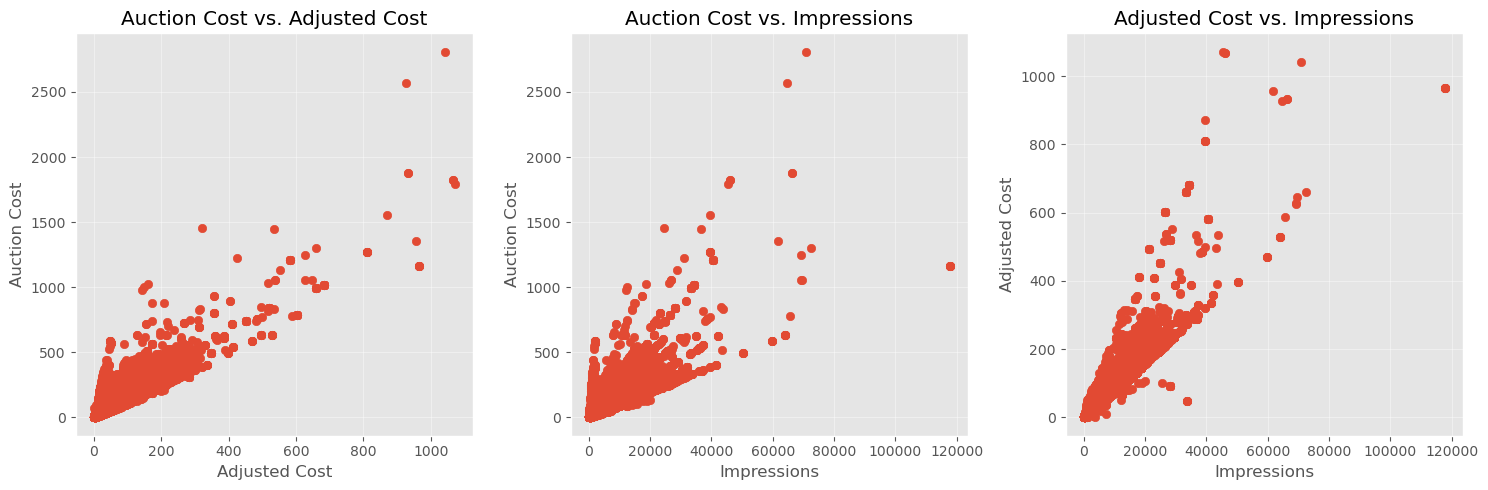


Linear Regression: auction_cost vs. adjusted_cost (after outlier removal)
  R-squared: 0.9531
  Intercept: 0.5787
  Slope: 1.3072

Linear Regression: auction_cost vs. impressions (after outlier removal)
  R-squared: 0.8480
  Intercept: 1.4153
  Slope: 0.0108

Linear Regression: adjusted_cost vs. impressions (after outlier removal)
  R-squared: 0.9783
  Intercept: 0.4501
  Slope: 0.0083


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Create 3 subplots arranged in a single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot: auction_cost vs. adjusted_cost
axes[0].scatter(filtered_df['adjusted_cost'], filtered_df['auction_cost'])
axes[0].set_title('Auction Cost vs. Adjusted Cost')
axes[0].set_xlabel('Adjusted Cost')
axes[0].set_ylabel('Auction Cost')
axes[0].grid(alpha=0.4)

# Scatter plot: auction_cost vs. impressions
axes[1].scatter(filtered_df['impressions'], filtered_df['auction_cost'])
axes[1].set_title('Auction Cost vs. Impressions')
axes[1].set_xlabel('Impressions')
axes[1].set_ylabel('Auction Cost')
axes[1].grid(alpha=0.4)

# Scatter plot: adjusted_cost vs. impressions
axes[2].scatter(filtered_df['impressions'], filtered_df['adjusted_cost'])
axes[2].set_title('Adjusted Cost vs. Impressions')
axes[2].set_xlabel('Impressions')
axes[2].set_ylabel('Adjusted Cost')
axes[2].grid(alpha=0.4)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display all plots
plt.show()

# Outlier detection and removal for auction_cost vs. adjusted_cost
z_scores_cost = np.abs((filtered_df[['auction_cost', 'adjusted_cost']] - filtered_df[['auction_cost', 'adjusted_cost']].mean()) / filtered_df[['auction_cost', 'adjusted_cost']].std())
filtered_df_no_outliers_cost = filtered_df[(z_scores_cost < 3).all(axis=1)]

# Re-fit linear regression for auction_cost vs. adjusted_cost (if outliers were removed)
X_cost = filtered_df_no_outliers_cost[['adjusted_cost']]
y_cost = filtered_df_no_outliers_cost['auction_cost']
model1 = LinearRegression().fit(X_cost, y_cost)

# Outlier detection and removal for cost vs. impressions
z_scores_imp = np.abs((filtered_df[['impressions', 'auction_cost', 'adjusted_cost']] - filtered_df[['impressions', 'auction_cost', 'adjusted_cost']].mean()) / filtered_df[['impressions', 'auction_cost', 'adjusted_cost']].std())
filtered_df_no_outliers_imp = filtered_df[(z_scores_imp < 3).all(axis=1)]

# Re-fit linear regression models for cost vs. impressions (if outliers were removed)
models = {}
for y_col in ['auction_cost', 'adjusted_cost']:
    X_imp = filtered_df_no_outliers_imp[['impressions']]
    y_imp = filtered_df_no_outliers_imp[y_col]
    model = LinearRegression().fit(X_imp, y_imp)
    models[y_col] = model

# Print R-squared and coefficients
print("\nLinear Regression: auction_cost vs. adjusted_cost (after outlier removal)")
print(f"  R-squared: {model1.score(X_cost, y_cost):.4f}")
print(f"  Intercept: {model1.intercept_:.4f}")
print(f"  Slope: {model1.coef_[0]:.4f}")

for y_col, model in models.items():
    print(f"\nLinear Regression: {y_col} vs. impressions (after outlier removal)")
    print(f"  R-squared: {model.score(X_imp, y_imp):.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Slope: {model.coef_[0]:.4f}")


In [18]:
import pandas as pd
import numpy as np

# Calculate CTR
data['CTR'] = data['clicks'] / data['impressions']
data['CTR'] = data['CTR'].fillna(0)  # Replace NaN values with 0

# Placement Slot Performance
placement_performance = data.groupby('placement_slot')[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)
print("Top 5 Placement Slots by Impressions:\n", placement_performance.head(5).to_markdown(numalign="left", stralign="left"))

# Targeting Secondary Analysis
targeting_performance = data.groupby('targeting_secondary')[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)
print("\nTop 10 Targeting Categories by Impressions:\n", targeting_performance.head(10).to_markdown(numalign="left", stralign="left"))

# Vertical and Sub-Vertical Performance
vertical_performance = data.groupby(['vertical', 'sub_vertical'])[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)
print("\nTop 10 Verticals and Sub-Verticals by Impressions:\n", vertical_performance.head(10).to_markdown(numalign="left", stralign="left"))

# Cost Analysis
avg_cost_per_impression_auction = data['auction_cost'].sum() / data['impressions'].sum()
avg_cost_per_impression_adjusted = data['adjusted_cost'].sum() / data['impressions'].sum()
avg_cost_per_click_auction = data['auction_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0
avg_cost_per_click_adjusted = data['adjusted_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0

print("\nAverage Cost per Impression (Auction):", avg_cost_per_impression_auction)
print("Average Cost per Impression (Adjusted):", avg_cost_per_impression_adjusted)
print("Average Cost per Click (Auction):", avg_cost_per_click_auction)
print("Average Cost per Click (Adjusted):", avg_cost_per_click_adjusted)

# Placement Slot CTR Analysis
placement_ctr = data.groupby('placement_slot')['CTR'].mean().sort_values(ascending=False)
print("\nTop 5 Placement Slots by CTR:\n", placement_ctr.head(5).to_markdown(numalign="left", stralign="left"))

# Targeting Secondary CTR Analysis
targeting_ctr = data.groupby('targeting_secondary')['CTR'].mean().sort_values(ascending=False)
print("\nTop 10 Targeting Categories by CTR:\n", targeting_ctr.head(10).to_markdown(numalign="left", stralign="left"))

# Vertical and Sub-Vertical CTR Analysis
vertical_ctr = data.groupby(['vertical', 'sub_vertical'])['CTR'].mean().sort_values(ascending=False)
print("\nTop 10 Verticals and Sub-Verticals by CTR:\n", vertical_ctr.head(10).to_markdown(numalign="left", stralign="left"))



Top 5 Placement Slots by Impressions:
 | placement_slot    | impressions   | clicks   | CTR         |
|:------------------|:--------------|:---------|:------------|
| offsite_desktop   | 6.0704e+08    | 42755    | 7.71599e-05 |
| offsite_mobileweb | 5.69589e+08   | 150877   | 0.000260454 |
| offsite_mobileapp | 4.81231e+06   | 1207     | 0.000221056 |

Top 10 Targeting Categories by Impressions:
 | targeting_secondary                            | impressions   | clicks   | CTR         |
|:-----------------------------------------------|:--------------|:---------|:------------|
| category=Women's Running Shoes                 | 2.61664e+08   | 2920     | 0.000284926 |
| category=Sheet & Pillowcase Sets               | 1.04394e+08   | 51569    | 0.000297201 |
| category=Single-Serve Coffee Capsules & Pods   | 7.41467e+07   | 22208    | 0.000184191 |
| category=Foundation Makeup                     | 6.4904e+07    | 642      | 2.81068e-05 |
| category=Golf Equipment                       

The analysis reveals interesting insights into the performance of different placement slots, targeting categories, and verticals based on impressions and click-through rate (CTR):

**1. Impressions:**

* **Placement Slot:** "Offsite desktop" dominates in terms of impressions, followed by "offsite mobile web." "Offsite mobile app" lags significantly behind.
* **Targeting Category:** "Women's Running Shoes" and "Sheet & Pillowcase Sets" are the top performers, but it's important to note that there are many unique targeting categories, indicating a wide range of interests being targeted.
* **Vertical/Sub-Vertical:** The "Softlines" vertical (specifically "Unknown") and "Hardlines" (specifically "Home and Furniture") are the most successful in generating impressions.

**2. Click-Through Rate (CTR):**

* **Placement Slot:** Despite having fewer impressions, "offsite mobile web" has the highest CTR, followed by "offsite mobile app." This indicates that while desktop ads are seen more often, mobile ads are more likely to be clicked on.
* **Targeting Category:** "Child Care" and "Electric Guitar Amplifier Heads" have the highest CTRs, highlighting the potential of niche targeting for engagement.
* **Vertical/Sub-Vertical:** "Softlines" (specifically "Watches" and "Luggage") and "Hardlines" (specifically "Automotive - Other" and "Pet Gear") show higher CTRs compared to the top performers in terms of impressions.

**3. Cost Analysis:**

* **Cost per Impression (CPI):** Both auction and adjusted CPI are relatively low, indicating that impressions are affordable.
* **Cost per Click (CPC):** CPC is quite high, suggesting that getting clicks is expensive. This could be due to low overall CTRs or high competition for certain keywords or placements.

**Recommendations:**

To **maximize impressions**, focus on:

* **Placement:** Prioritize "offsite desktop" and "offsite mobile web" due to their high impression volume.
* **Targeting:** Consider exploring categories with high impressions, such as "Women's Running Shoes," "Sheet & Pillowcase Sets," and others from the top 10 list.
* **Verticals:** Continue targeting "Softlines" and "Hardlines," as they are already performing well.

To **maximize click-through rate (CTR)**, experiment with:

* **Placement:** Allocate more budget to "offsite mobile web" and "offsite mobile app" due to their higher CTRs.
* **Targeting:** Test categories with high CTRs, even if their impression volume is lower, like "Child Care" or niche product categories.
* **Verticals:** Explore less popular verticals with high CTRs, like "Softlines" (specifically "Watches" and "Luggage") and niche categories within "Hardlines."

**Bidding Strategy:**

* **High-Impression Categories:** For categories with high impressions but low CTR, consider lowering bids to reduce costs while maintaining a decent number of impressions.
* **High-CTR Categories:** For categories with high CTR, gradually increase bids to potentially gain more clicks without drastically increasing costs.
* **Placement-Based Bidding:** Adjust bids based on placement slot performance. Lower bids for "offsite desktop" and higher bids for "offsite mobile web" might be a good starting point.
* **Continuous Optimization:** Monitor the performance of different bidding strategies and make adjustments based on results.

**Additional Considerations:**

* **New to Brand Reach:** Explore targeting options that reach new audiences, such as lookalike audiences or interest-based targeting.
* **Creative Optimization:** Experiment with different ad creatives to see which ones resonate best with different audience segments and lead to higher CTRs.
* **Landing Page Optimization:** Ensure that the landing pages associated with your ads are relevant and engaging to encourage users to take desired actions.

Remember, this analysis is limited by the available data. Gathering more granular data on **audience demographics** and interests, as well as experimenting with different bidding strategies, will be crucial for developing a truly optimal targeting and bidding strategy.


### What are different optiminal targeting and bidding strategies that we can use in this case? 
The analysis has revealed several insights about the performance of different placement slots, targeting categories, and verticals in terms of impressions and click-through rate (CTR). We can use these insights to devise optimal targeting and bidding strategies.

We will segment the data based on placement_slot, targeting_secondary, and vertical and sub_vertical combinations. For each segment, we will calculate the following metrics:

- Total impressions
- Total clicks
- Average CTR
- Total auction cost
- Total adjusted cost
- Average cost per impression (CPI) for both auction and adjusted costs
- Average cost per click (CPC) for both auction and adjusted costs

This will allow us to compare the performance of different segments and identify the most promising ones for targeting and bidding.



In [19]:
# Segment by placement_slot
placement_performance = data.groupby('placement_slot').agg(
    Impressions=('impressions', 'sum'),
    Clicks=('clicks', 'sum'),
    CTR=('CTR', 'mean'),
    Auction_Cost=('auction_cost', 'sum'),
    Adjusted_Cost=('adjusted_cost', 'sum')
)
placement_performance['Auction_CPI'] = placement_performance['Auction_Cost'] / placement_performance['Impressions']
placement_performance['Adjusted_CPI'] = placement_performance['Adjusted_Cost'] / placement_performance['Impressions']
placement_performance['Auction_CPC'] = placement_performance['Auction_Cost'] / placement_performance['Clicks']
placement_performance['Adjusted_CPC'] = placement_performance['Adjusted_Cost'] / placement_performance['Clicks']
placement_performance.fillna(0, inplace=True)
print("\nPlacement Slot Performance:\n", placement_performance.sort_values(by='Impressions', ascending=False).head(5).to_markdown(numalign="left", stralign="left"))

# Segment by targeting_secondary
targeting_performance = data.groupby('targeting_secondary').agg(
    Impressions=('impressions', 'sum'),
    Clicks=('clicks', 'sum'),
    CTR=('CTR', 'mean'),
    Auction_Cost=('auction_cost', 'sum'),
    Adjusted_Cost=('adjusted_cost', 'sum')
)
targeting_performance['Auction_CPI'] = targeting_performance['Auction_Cost'] / targeting_performance['Impressions']
targeting_performance['Adjusted_CPI'] = targeting_performance['Adjusted_Cost'] / targeting_performance['Impressions']
targeting_performance['Auction_CPC'] = targeting_performance['Auction_Cost'] / targeting_performance['Clicks']
targeting_performance['Adjusted_CPC'] = targeting_performance['Adjusted_Cost'] / targeting_performance['Clicks']
targeting_performance.fillna(0, inplace=True)
print("\nTargeting Secondary Performance:\n", targeting_performance.sort_values(by='Impressions', ascending=False).head(5).to_markdown(numalign="left", stralign="left"))

# Segment by vertical and sub_vertical
vertical_performance = data.groupby(['vertical', 'sub_vertical']).agg(
    Impressions=('impressions', 'sum'),
    Clicks=('clicks', 'sum'),
    CTR=('CTR', 'mean'),
    Auction_Cost=('auction_cost', 'sum'),
    Adjusted_Cost=('adjusted_cost', 'sum')
)
vertical_performance['Auction_CPI'] = vertical_performance['Auction_Cost'] / vertical_performance['Impressions']
vertical_performance['Adjusted_CPI'] = vertical_performance['Adjusted_Cost'] / vertical_performance['Impressions']
vertical_performance['Auction_CPC'] = vertical_performance['Auction_Cost'] / vertical_performance['Clicks']
vertical_performance['Adjusted_CPC'] = vertical_performance['Adjusted_Cost'] / vertical_performance['Clicks']
vertical_performance.fillna(0, inplace=True)
print("\nVertical and Sub-Vertical Performance:\n", vertical_performance.sort_values(by='Impressions', ascending=False).head(5).to_markdown(numalign="left", stralign="left"))



Placement Slot Performance:
 | placement_slot    | Impressions   | Clicks   | CTR         | Auction_Cost   | Adjusted_Cost   | Auction_CPI   | Adjusted_CPI   | Auction_CPC   | Adjusted_CPC   |
|:------------------|:--------------|:---------|:------------|:---------------|:----------------|:--------------|:---------------|:--------------|:---------------|
| offsite_desktop   | 6.0704e+08    | 42755    | 7.71599e-05 | 7.14549e+06    | 5.19683e+06     | 0.011771      | 0.00856094     | 167.126       | 121.549        |
| offsite_mobileweb | 5.69589e+08   | 150877   | 0.000260454 | 6.84495e+06    | 4.98924e+06     | 0.0120173     | 0.00875937     | 45.3677       | 33.0682        |
| offsite_mobileapp | 4.81231e+06   | 1207     | 0.000221056 | 62983.4        | 41726.5         | 0.013088      | 0.00867078     | 52.1818       | 34.5704        |

Targeting Secondary Performance:
 | targeting_secondary                          | Impressions   | Clicks   | CTR         | Auction_Cost   | Adjusted

['ADV_ID', 'AD_ID', 'SKU', 'placement_slot', 'impressions', 'clicks', 'auction_cost', 'adjusted_cost', 'hit_day_utc', 'targeting_secondary', 'vertical', 'sub_vertical', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders', 'hit_day_utc_parsed', 'month_name', 'day_name', 'CTR']
Top 5 Placement Slots by Impressions:
 | placement_slot    | impressions   | clicks   | CTR         |
|:------------------|:--------------|:---------|:------------|
| offsite_desktop   | 6.0704e+08    | 42755    | 7.71599e-05 |
| offsite_mobileweb | 5.69589e+08   | 150877   | 0.000260454 |
| offsite_mobileapp | 4.81231e+06   | 1207     | 0.000221056 |

Top 10 Targeting Categories by Impressions:
 | targeting_secondary                            | impressions   | clicks   | CTR         |
|:-----------------------------------------------|:--------------|:---------|:------------|
| cate

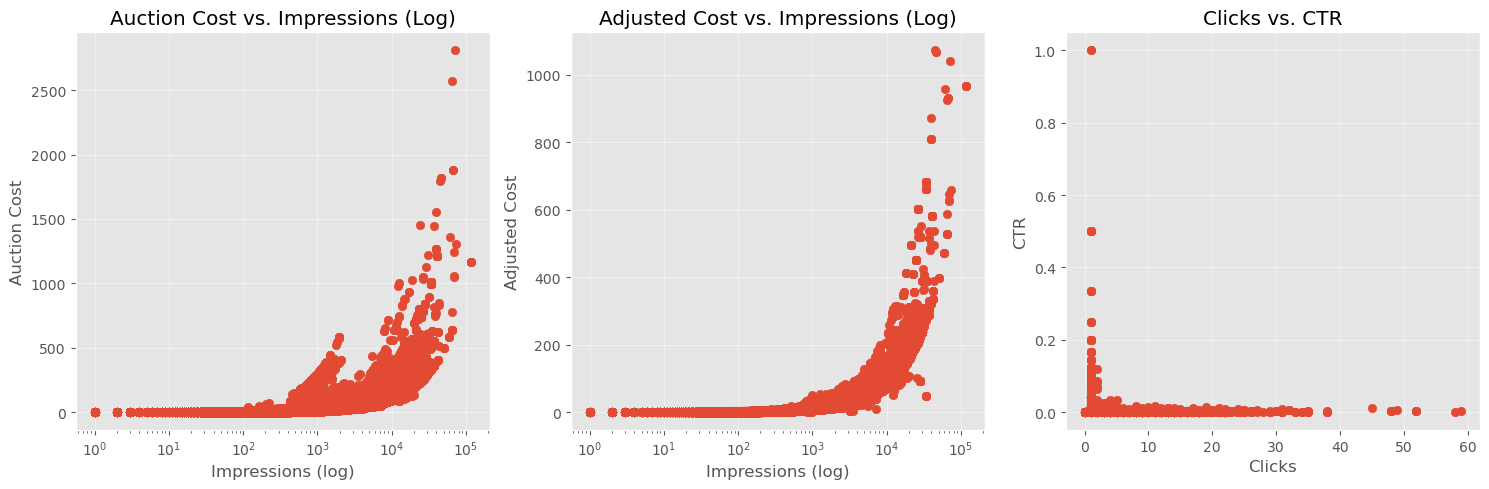

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Print the column names
print(data.columns.tolist())

# 2. Calculate CTR by dividing clicks by impressions and fill NaN values with 0.
data['CTR'] = data['clicks'] / data['impressions']
data['CTR'] = data['CTR'].fillna(0)

# 3. Group by placement_slot and calculate the sum of impressions and clicks, and the mean of CTR. Sort the results by impressions in descending order.
placement_performance = data.groupby('placement_slot')[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)

# 4. Group by targeting_secondary and calculate the sum of impressions and clicks, and the mean of CTR. Sort the results by impressions in descending order.
targeting_performance = data.groupby('targeting_secondary')[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)

# 5. Group by vertical and sub_vertical and calculate the sum of impressions and clicks, and the mean of CTR. Sort the results by impressions in descending order.
vertical_performance = data.groupby(['vertical', 'sub_vertical'])[['impressions', 'clicks', 'CTR']].agg({'impressions': 'sum', 'clicks': 'sum', 'CTR': 'mean'}).sort_values(by='impressions', ascending=False)

# 6. Calculate the average cost per impression for both auction_cost and adjusted_cost.
avg_cost_per_impression_auction = data['auction_cost'].sum() / data['impressions'].sum()
avg_cost_per_impression_adjusted = data['adjusted_cost'].sum() / data['impressions'].sum()

# 7. Calculate the average cost per click for both auction_cost and adjusted_cost, handling the case where the sum of clicks is 0.
avg_cost_per_click_auction = data['auction_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0
avg_cost_per_click_adjusted = data['adjusted_cost'].sum() / data['clicks'].sum() if data['clicks'].sum() != 0 else 0

# 8. Group by placement_slot and calculate the mean CTR. Sort the results in descending order.
placement_ctr = data.groupby('placement_slot')['CTR'].mean().sort_values(ascending=False)

# 9. Group by targeting_secondary and calculate the mean CTR. Sort the results in descending order.
targeting_ctr = data.groupby('targeting_secondary')['CTR'].mean().sort_values(ascending=False)

# 10. Group by vertical and sub_vertical and calculate the mean CTR. Sort the results in descending order.
vertical_ctr = data.groupby(['vertical', 'sub_vertical'])['CTR'].mean().sort_values(ascending=False)

# 11. Display results
print("Top 5 Placement Slots by Impressions:\n", placement_performance.head(5).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 Targeting Categories by Impressions:\n", targeting_performance.head(10).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 Verticals and Sub-Verticals by Impressions:\n", vertical_performance.head(10).to_markdown(numalign="left", stralign="left"))
print("\nAverage Cost per Impression (Auction):", avg_cost_per_impression_auction)
print("Average Cost per Impression (Adjusted):", avg_cost_per_impression_adjusted)
print("Average Cost per Click (Auction):", avg_cost_per_click_auction)
print("Average Cost per Click (Adjusted):", avg_cost_per_click_adjusted)
print("\nTop 5 Placement Slots by CTR:\n", placement_ctr.head(5).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 Targeting Categories by CTR:\n", targeting_ctr.head(10).to_markdown(numalign="left", stralign="left"))
print("\nTop 10 Verticals and Sub-Verticals by CTR:\n", vertical_ctr.head(10).to_markdown(numalign="left", stralign="left"))

# 12. Create 3 subplots arranged in a single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 13. Scatter plot: impressions (log) vs. auction_cost
axes[0].scatter(data['impressions'], data['auction_cost'])
axes[0].set_xscale('log')
axes[0].set_title('Auction Cost vs. Impressions (Log)')
axes[0].set_xlabel('Impressions (log)')
axes[0].set_ylabel('Auction Cost')
axes[0].grid(alpha=0.4)

# 14. Scatter plot: impressions (log) vs. adjusted_cost
axes[1].scatter(data['impressions'], data['adjusted_cost'])
axes[1].set_xscale('log')
axes[1].set_title('Adjusted Cost vs. Impressions (Log)')
axes[1].set_xlabel('Impressions (log)')
axes[1].set_ylabel('Adjusted Cost')
axes[1].grid(alpha=0.4)

# 15. Scatter plot: clicks vs. CTR
axes[2].scatter(data['clicks'], data['CTR'])
axes[2].set_title('Clicks vs. CTR')
axes[2].set_xlabel('Clicks')
axes[2].set_ylabel('CTR')
axes[2].grid(alpha=0.4)

# 16. Adjust layout to prevent overlapping elements
plt.tight_layout()

# 17. Display all plots
plt.show()



['ADV_ID', 'AD_ID', 'SKU', 'placement_slot', 'impressions', 'clicks', 'auction_cost', 'adjusted_cost', 'hit_day_utc', 'targeting_secondary', 'vertical', 'sub_vertical', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders']
Top 5 Placement Slots by Impressions:
 | placement_slot    | impressions   | clicks   | CTR         |
|:------------------|:--------------|:---------|:------------|
| offsite_desktop   | 7.62074e+06   | 58       | 1.16564e-05 |
| offsite_mobileweb | 7.36842e+06   | 0        | 0           |
| offsite_mobileapp | 107773        | 2        | 2.38104e-05 |

Top 10 Targeting Categories by Impressions:
 | targeting_secondary                              | impressions   | clicks   | CTR         |
|:-------------------------------------------------|:--------------|:---------|:------------|
| category=Women's Running Shoes                   | 1.78684e+06   | 0        | 0           |
| category=Bedding                                 | 1.19096e+06   | 0        | 0           |
| category=Golf Equipment                          | 971725        | 0        | 0           |
| category=Grocery Cookies                         | 676562        | 0        | 0           |
| category=Single-Serve Coffee Capsules & Pods     | 584017        | 0        | 0           |
| category=Foundation Makeup                       | 526302        | 0        | 0           |
| content-category=Family                          | 451731        | 0        | 0           |
| category=Probiotic Nutritional Supplements       | 445775        | 0        | 0           |
| category=Desk Accessories & Workspace Organizers | 374720        | 8        | 1.40345e-05 |
| category=Canned & Jarred Seafood                 | 349217        | 0        | 0           |

Top 10 Verticals and Sub-Verticals by Impressions:
 |                                                         | impressions   | clicks   | CTR         |
|:--------------------------------------------------------|:--------------|:---------|:------------|
| ('Consumer Packaged Goods', 'Health and Personal Care') | 3.43168e+06   | 5        | 1.30782e-06 |
| ('Hardlines', 'Home and Furniture')                     | 2.31938e+06   | 12       | 1.17591e-06 |
| ('Hardlines', 'Sporting Goods')                         | 1.49158e+06   | 6        | 1.76261e-05 |
| ('Consumer Packaged Goods', 'Beauty')                   | 1.24289e+06   | 0        | 0           |
| ('Automotive', 'Automotive - Other')                    | 518290        | 3        | 3.49453e-05 |
| ('Hardlines', 'Tools and Home Improvement')             | 424883        | 11       | 1.54012e-05 |
| ('Hardlines', 'Toys')                                   | 410774        | 1        | 1.58258e-06 |
| ('Consumer Packaged Goods', 'Grocery - Beverage')       | 400017        | 0        | 0           |
| ('Softlines', 'Apparel')                                | 392550        | 1        | 8.07348e-07 |
| ('Consumer Packaged Goods', 'Grocery - Food')           | 382450        | 0        | 0           |

Average Cost per Impression (Auction): 0.013272964394478134
Average Cost per Impression (Adjusted): 0.008850876220645685
Average Cost per Click (Auction): 3339.6831301666666
Average Cost per Click (Adjusted): 2227.017350666667

Top 5 Placement Slots by CTR:
 | placement_slot    | CTR         |
|:------------------|:------------|
| offsite_mobileapp | 2.38104e-05 |
| offsite_desktop   | 1.16564e-05 |
| offsite_mobileweb | 0           |

Top 10 Targeting Categories by CTR:
 | targeting_secondary                            | CTR         |
|:-----------------------------------------------|:------------|
| content-category=Holiday                       | 0.0117647   |
| category=Push-to-Connect Fittings              | 0.000416667 |
| content-category=Sports                        | 0.000298063 |
| category=Mini Computers                        | 0.00020938  |
| category=Electric Vehicle Charging Stations    | 0.000178827 |
| content-category=Action/Adventure              | 0.000167574 |
| category=Foam Rollers                          | 0.000164853 |
| content-category=Video Gaming                  | 0.000135851 |
| category=Household Furnace Parts & Accessories | 0.000101999 |
| category=Health & Household                    | 0.00010142  |

Top 10 Verticals and Sub-Verticals by CTR:
 |                                                         | CTR         |
|:--------------------------------------------------------|:------------|
| ('Hardlines', 'PC Hardware')                            | 4.68341e-05 |
| ('Automotive', 'Automotive - Other')                    | 3.49453e-05 |
| ('Hardlines', 'BISS')                                   | 2.04248e-05 |
| ('Hardlines', 'Sporting Goods')                         | 1.76261e-05 |
| ('Hardlines', 'Tools and Home Improvement')             | 1.54012e-05 |
| ('Hardlines', 'Consumer Electronics')                   | 6.78588e-06 |
| ('Hardlines', 'Toys')                                   | 1.58258e-06 |
| ('Consumer Packaged Goods', 'Health and Personal Care') | 1.30782e-06 |
| ('Hardlines', 'Home and Furniture')                     | 1.17591e-06 |
| ('Consumer Packaged Goods', 'Pet Consumables')          | 8.38262e-07 |

Placement Slot Performance:
 | placement_slot    | Impressions   | Clicks   | CTR         | Auction_Cost   | Adjusted_Cost   | Auction_CPI   | Adjusted_CPI   | Auction_CPC   | Adjusted_CPC   |
|:------------------|:--------------|:---------|:------------|:---------------|:----------------|:--------------|:---------------|:--------------|:---------------|
| offsite_desktop   | 6.0704e+08    | 42755    | 7.71599e-05 | 7.14549e+06    | 5.19683e+06     | 0.011771      | 0.00856094     | 167.126       | 121.549        |
| offsite_mobileweb | 5.69589e+08   | 150877   | 0.000260454 | 6.84495e+06    | 4.98924e+06     | 0.0120173     | 0.00875937     | 45.3677       | 33.0682        |
| offsite_mobileapp | 4.81231e+06   | 1207     | 0.000221056 | 62983.4        | 41726.5         | 0.013088      | 0.00867078     | 52.1818       | 34.5704        |

Targeting Secondary Performance:
 | targeting_secondary                          | Impressions   | Clicks   | CTR         | Auction_Cost   | Adjusted_Cost   | Auction_CPI   | Adjusted_CPI   | Auction_CPC   | Adjusted_CPC   |
|:---------------------------------------------|:--------------|:---------|:------------|:---------------|:----------------|:--------------|:---------------|:--------------|:---------------|
| category=Women's Running Shoes               | 2.61664e+08   | 2920     | 0.000284926 | 2.55957e+06    | 2.07575e+06     | 0.0097819     | 0.00793287     | 876.565       | 710.872        |
| category=Sheet & Pillowcase Sets             | 1.04394e+08   | 51569    | 0.000297201 | 1.02868e+06    | 846682          | 0.00985382    | 0.00811042     | 19.9477       | 16.4184        |
| category=Single-Serve Coffee Capsules & Pods | 7.41467e+07   | 22208    | 0.000184191 | 784911         | 629080          | 0.0105859     | 0.00848426     | 35.3436       | 28.3267        |
| category=Foundation Makeup                   | 6.4904e+07    | 642      | 2.81068e-05 | 636834         | 517419          | 0.00981194    | 0.00797207     | 991.953       | 805.949        |
| category=Golf Equipment                      | 4.95675e+07   | 18675    | 0.000260073 | 512640         | 418073          | 0.0103422     | 0.00843441     | 27.4506       | 22.3868        |

Vertical and Sub-Vertical Performance:
 |                                                         | Impressions   | Clicks   | CTR         | Auction_Cost   | Adjusted_Cost   | Auction_CPI   | Adjusted_CPI   | Auction_CPC   | Adjusted_CPC   |
|:--------------------------------------------------------|:--------------|:---------|:------------|:---------------|:----------------|:--------------|:---------------|:--------------|:---------------|
| ('Softlines', 'Unknown')                                | 2.70704e+08   | 4595     | 0.000236746 | 2.64907e+06    | 2.14828e+06     | 0.00978585    | 0.00793591     | 576.511       | 467.526        |
| ('Hardlines', 'Home and Furniture')                     | 1.58837e+08   | 60366    | 0.000253466 | 1.67461e+06    | 1.31703e+06     | 0.0105429     | 0.00829172     | 27.7409       | 21.8175        |
| ('Consumer Packaged Goods', 'Health and Personal Care') | 1.36249e+08   | 31705    | 0.000200707 | 1.83448e+06    | 1.21078e+06     | 0.0134642     | 0.00888653     | 57.861        | 38.1889        |
| ('Consumer Packaged Goods', 'Beauty')                   | 1.0487e+08    | 5407     | 0.000118063 | 1.17984e+06    | 889758          | 0.0112505     | 0.00848441     | 218.205       | 164.557        |
| ('Consumer Packaged Goods', 'Grocery - Food')           | 7.58287e+07   | 4166     | 0.000105456 | 963592         | 679118          | 0.0127075     | 0.00895594     | 231.299       | 163.014        |

# Below is to load data again, lost some columns after doing some analysis above:

In [33]:
# Define the path to file

# data_all = pd.read_csv("/Users/mayliamoua/Desktop/Boardroom Analytics/Amazon_Ads/SU-shareable-all.csv")
data = pd.read_csv("/Users/mayliamoua/Desktop/Boardroom Analytics/Amazon_Ads/Amazon Ads All.csv")
## CLEANING
# Attempt to parse dates in the '%d/%m/%y' format
data['hit_day_utc_parsed'] = pd.to_datetime(data['hit_day_utc'], format='%d/%m/%y', errors='coerce')
 
# Parse remaining unparsed dates in the '%Y-%m-%d %H:%M:%S' format
mask = data['hit_day_utc_parsed'].isna()
data.loc[mask, 'hit_day_utc_parsed'] = pd.to_datetime(data.loc[mask, 'hit_day_utc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
 
# Check for any remaining non-parsed dates
remaining_non_parsed = data[data['hit_day_utc_parsed'].isna()]
if not remaining_non_parsed.empty:
    print("Remaining non-parsed dates:")
    print(remaining_non_parsed)
    
# Print unique months in the parsed 'hit_day_utc_parsed' column
print("Unique months in 'hit_day_utc_parsed':")
print(data['hit_day_utc_parsed'].dt.month.unique())
 
# Extract month and day of the week from parsed dates
data['month_name'] = data['hit_day_utc_parsed'].dt.strftime('%B')  # Get month names
data['day_name'] = data['hit_day_utc_parsed'].dt.strftime('%A')    # Get day names
 
# Fill missing values in 'vertical' and 'sub_vertical' with 'Unknown'
data['vertical'].fillna('Unknown', inplace=True)
data['sub_vertical'].fillna('Unknown', inplace=True)
 
# Identify the last 6 columns
last_6_columns = data.columns[-6:]

# Fill missing values in the last 6 columns with 0
data[last_6_columns] = data[last_6_columns].fillna(0)

# Replace missing values with 0
data.fillna(0, inplace=True) 

# Display the number of missing values again in each column to make sure there are none and code works above
print(data.isnull().sum().to_markdown(numalign="left", stralign="left"))

Unique months in 'hit_day_utc_parsed':
[5 4 3 2]
|                                 | 0   |
|:--------------------------------|:----|
| ADV_ID                          | 0   |
| AD_ID                           | 0   |
| SKU                             | 0   |
| placement_slot                  | 0   |
| impressions                     | 0   |
| clicks                          | 0   |
| auction_cost                    | 0   |
| adjusted_cost                   | 0   |
| hit_day_utc                     | 0   |
| targeting_secondary             | 0   |
| vertical                        | 0   |
| sub_vertical                    | 0   |
| ntb_click_attributed_units_sold | 0   |
| ntb_view_attributed_units_sold  | 0   |
| ntb_click_attributed_orders     | 0   |
| ntb_view_attributed_orders      | 0   |
| view_attributed_units_sold      | 0   |
| view_attributed_orders          | 0   |
| hit_day_utc_parsed              | 0   |
| month_name                      | 0   |
| day_name                 

In [34]:
data.head()

ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   84373  1295011  7875390725    offsite_desktop         2043       0   
2   84373  6370624  9985955750  offsite_mobileweb         1452       0   
3   84373  1295011  7875390725    offsite_desktop         1312       0   
4   84373  1295011  7875390725  offsite_mobileapp            8       0   

   auction_cost  adjusted_cost hit_day_utc  \
0      10.89000        8.79000    02/05/24   
1      26.61464       19.44791    01/05/24   
2      14.52000       11.68400    01/05/24   
3      16.59940       11.94286    30/04/24   
4       0.11608        0.07161    01/05/24   

                                 targeting_secondary  ...        sub_vertical  \
0       category=Automotive Replacement Control Arms  ...  Automotive - Other   
1         category=Automotive Replacement Brake Kits  ...  Automotive - Other   
2       category=Automotive Replacement Control Arms  ...  Automotive - Other   
3  category=Automotive Replacement Hub Assemblies...  ...  Automotive - Other   
4         category=Automotive Replacement Brake Kits  ...  Automotive - Other   

  ntb_click_attributed_units_sold  ntb_view_attributed_units_sold  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   ntb_click_attributed_orders  ntb_view_attributed_orders  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   view_attributed_units_sold  view_attributed_orders  hit_day_utc_parsed  \
0                         1.0                     1.0          2024-05-02   
1                         0.0                     0.0          2024-05-01   
2                         0.0                     0.0          2024-05-01   
3                         0.0                     0.0          2024-04-30   
4                         0.0                     0.0          2024-05-01   

  month_name   day_name  
0        May   Thursday  
1        May  Wednesday  
2        May  Wednesday  
3      April    Tuesday  
4        May  Wednesday  

[5 rows x 21 columns]

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
data = pd.read_csv('SU-shareable-430-501.csv')

# Drop rows with nulls in the specified columns
data.dropna(subset=['ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders'], inplace=True)

# Convert `hit_day_utc` to datetime
data['hit_day_utc'] = pd.to_datetime(data['hit_day_utc'], format='%m/%d/%y')

# Filter to columns of interest (including hit_day_utc)
data_filtered = data[['impressions', 'clicks', 'placement_slot', 'targeting_secondary', 'vertical', 'sub_vertical', 'hit_day_utc']]

# Extract month name and day name
data_filtered['month_name'] = data_filtered['hit_day_utc'].dt.month_name()
data_filtered['day_name'] = data_filtered['hit_day_utc'].dt.day_name()

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['placement_slot', 'targeting_secondary', 'vertical', 'sub_vertical', 'month_name', 'day_name']
encoded_cols = encoder.fit_transform(data_filtered[categorical_cols])
encoded_cols_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical variable
scaler = StandardScaler()
clicks_scaled = scaler.fit_transform(data_filtered[['clicks']])

# Combine features
X = pd.concat([pd.DataFrame(clicks_scaled, columns=['clicks']), encoded_cols_data], axis=1)
y = data_filtered['impressions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


/var/folders/ck/nvh7h2kn0djctx2334nm3w4h0000gn/T/ipykernel_30470/3721034130.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month_name'] = data_filtered['hit_day_utc'].dt.month_name()
/var/folders/ck/nvh7h2kn0djctx2334nm3w4h0000gn/T/ipykernel_30470/3721034130.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['day_name'] = data_filtered['hit_day_utc'].dt.day_name()


Mean Squared Error (MSE): 5996228.766984719
R-squared: 0.28373507878880777


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Section Break

Convert categorical features to numerical using one-hot encoding.

In [36]:
# Prepare data for modeling
features = data.drop(['hit_day_utc'], axis=1)
features = pd.get_dummies(features, drop_first=True)


In [37]:
# Creating new features such as Click-Through Rate (CTR)
data['CTR'] = data['clicks'] / data['impressions']
data['Cost_per_Impression'] = data['adjusted_cost'] / data['impressions']


## Model 1: Linear Regression for Impressions

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target variable for impressions
target_impressions = data['impressions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_impressions, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 670.1942946583309
R^2 Score: 0.9999199435708153


## Model 2: Logistic Regression for NTB Reach

Focus on predicting whether an ad will result in NTB clicks or views leading to sales.

Confusion Matrix:
[[1379    0]
 [   0    1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

ROC AUC Score: 1.0
Precision-Recall AUC: 1.0
Accuracy: 1.0


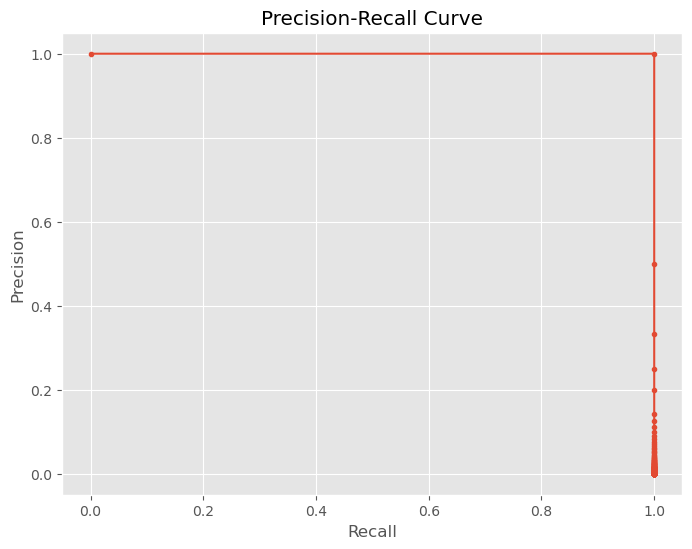

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Extract month and day from 'hit_day_utc'
data['hit_day_utc'] = pd.to_datetime(data['hit_day_utc'], format='%m/%d/%y', errors='coerce')
data['month'] = data['hit_day_utc'].dt.month
data['day'] = data['hit_day_utc'].dt.day

# Prepare data for logistic regression
features = data.drop(['clicks', 'hit_day_utc', 'impressions'], axis=1)
target = (data['ntb_click_attributed_units_sold'] > 0).astype(int)

# Convert categorical variables into dummy variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("ROC AUC Score:", roc_auc)
print("Precision-Recall AUC:", pr_auc)
print("Accuracy:", accuracy)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = data[['impressions', 'clicks', 'auction_cost', 'adjusted_cost', 'CTR']]
y = data['ntb_click_attributed_units_sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE:', mse)


Random Forest MSE: 8.563195046284595e-05
